In [1]:
import pandas as pd
Standard_Standard = pd.read_csv('C:/Users/Miley/openpose/build3/output_csv/standard_standard0.02.csv', header=None, encoding='gb2312', sep=',')
Standard_Narrow = pd.read_csv('C:/Users/Miley/openpose/build3/output_csv/standard_narrow0.02.csv', header=None, encoding='gb2312', sep=',')
Standard_Wide = pd.read_csv('C:/Users/Miley/openpose/build3/output_csv/standard_wide0.02.csv', header=None, encoding='gb2312', sep=',')
Narrow_Standard = pd.read_csv('C:/Users/Miley/openpose/build3/output_csv/narrow_standard0.02.csv', header=None, encoding='gb2312', sep=',')
Narrow_Narrow = pd.read_csv('C:/Users/Miley/openpose/build3/output_csv/narrow_narrow0.02.csv', header=None, encoding='gb2312', sep=',')
Narrow_Wide = pd.read_csv('C:/Users/Miley/openpose/build3/output_csv/narrow_wide0.02.csv', header=None, encoding='gb2312', sep=',')
Wide_Standard = pd.read_csv('C:/Users/Miley/openpose/build3/output_csv/wide_standard0.02.csv', header=None, encoding='gb2312', sep=',')
Wide_Narrow = pd.read_csv('C:/Users/Miley/openpose/build3/output_csv/wide_narrow0.02.csv', header=None, encoding='gb2312', sep=',')
Wide_Wide = pd.read_csv('C:/Users/Miley/openpose/build3/output_csv/wide_wide0.02.csv', header=None, encoding='gb2312', sep=',')

In [2]:
Standard_Standard_Train = Standard_Standard.sample(frac=0.9,axis=0)
Standard_Narrow_Train = Standard_Narrow.sample(frac=0.9,axis=0)
Standard_Wide_Train = Standard_Wide.sample(frac=0.9,axis=0)
Narrow_Standard_Train = Narrow_Standard.sample(frac=0.9,axis=0)
Narrow_Narrow_Train = Narrow_Narrow.sample(frac=0.9,axis=0)
Narrow_Wide_Train = Narrow_Wide.sample(frac=0.9,axis=0)
Wide_Standard_Train = Wide_Standard.sample(frac=0.9,axis=0)
Wide_Narrow_Train = Wide_Narrow.sample(frac=0.9,axis=0)
Wide_Wide_Train = Wide_Wide.sample(frac=0.9,axis=0)

In [3]:
Standard_Standard_Exam = Standard_Standard.drop(Standard_Standard_Train.index)
Standard_Narrow_Exam = Standard_Narrow.drop(Standard_Narrow_Train.index)
Standard_Wide_Exam = Standard_Wide.drop(Standard_Wide_Train.index)
Narrow_Standard_Exam = Narrow_Standard.drop(Narrow_Standard_Train.index)
Narrow_Narrow_Exam = Narrow_Narrow.drop(Narrow_Narrow_Train.index)
Narrow_Wide_Exam = Narrow_Wide.drop(Narrow_Wide_Train.index)
Wide_Standard_Exam = Wide_Standard.drop(Wide_Standard_Train.index)
Wide_Narrow_Exam = Wide_Narrow.drop(Wide_Narrow_Train.index)
Wide_Wide_Exam = Wide_Wide.drop(Wide_Wide_Train.index)

In [4]:
import numpy as np 
dataset = np.concatenate((Standard_Standard_Train, Standard_Narrow_Train, Standard_Wide_Train, 
                          Narrow_Standard_Train, Narrow_Narrow_Train, Narrow_Wide_Train, 
                          Wide_Standard_Train, Wide_Narrow_Train, Wide_Wide_Train), axis=0) 
dataset.shape

(36121, 32)

In [5]:
labels = np.zeros(len(Standard_Standard_Train))  
labels = np.append(labels, np.full((len(Standard_Narrow_Train)), 1))
labels = np.append(labels, np.full((len(Standard_Wide_Train)), 2))
labels = np.append(labels, np.full((len(Narrow_Standard_Train)), 3))
labels = np.append(labels, np.full((len(Narrow_Narrow_Train)), 4))
labels = np.append(labels, np.full((len(Narrow_Wide_Train)), 5))
labels = np.append(labels, np.full((len(Wide_Standard_Train)), 6))
labels = np.append(labels, np.full((len(Wide_Narrow_Train)), 7))
labels = np.append(labels, np.full((len(Wide_Wide_Train)), 8))
print(labels) 
print("The amount of data: %i" % len(labels))

[0. 0. 0. ... 8. 8. 8.]
The amount of data: 36121


In [6]:
from sklearn.utils import shuffle  
X1, y1 = shuffle(dataset, labels) 

In [7]:
from tensorflow.python.keras import utils
from keras.utils import np_utils
y1 = np_utils.to_categorical(y1, 9) #9 states. 
print(y1.shape[1])
print(y1.shape)
print(y1)

9
(36121, 9)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [8]:
X1 = np.reshape(X1, (X1.shape[0], 32, 1))
X1

array([[[0.460107 ],
        [0.413504 ],
        [0.317161 ],
        ...,
        [0.947085 ],
        [0.408937 ],
        [0.935514 ]],

       [[0.46091  ],
        [0.390748 ],
        [0.348289 ],
        ...,
        [0.94697  ],
        [0.0930264],
        [0.992561 ]],

       [[0.510782 ],
        [0.3791   ],
        [0.357889 ],
        ...,
        [0.843741 ],
        [0.19403  ],
        [0.797729 ]],

       ...,

       [[0.46997  ],
        [0.562352 ],
        [0.347643 ],
        ...,
        [0.946925 ],
        [0.419037 ],
        [0.918296 ]],

       [[0.490301 ],
        [0.430493 ],
        [0.357831 ],
        ...,
        [0.946785 ],
        [0.438962 ],
        [0.929707 ]],

       [[0.511042 ],
        [0.482023 ],
        [0.367696 ],
        ...,
        [0.895327 ],
        [0.368462 ],
        [0.855344 ]]])

In [2]:
from __future__ import print_function  
import numpy as np  
np.random.seed(1337)  # for reproducibility  
 
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
#from metrics import mean_squared_error
from keras import backend
#get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline

In [3]:
from __future__ import print_function  
import numpy as np  
np.random.seed(1337)  # for reproducibility

from tensorflow.python import keras as keras  
from tensorflow.keras.datasets import mnist  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Dropout, Activation  
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.utils import np_utils  
import matplotlib.pyplot as plt  
#get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline 

In [4]:
#LossHistory
class LossHistory(keras.callbacks.Callback):
    def __init__(self):
        self.losses = {'batch': [], 'epoch': []}
        self.accuracy = {'batch': [], 'epoch': []}
        self.val_loss = {'batch': [], 'epoch': []}
        self.val_accuracy = {'batch': [], 'epoch': []}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('accuracy'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_accuracy['batch'].append(logs.get('val_accuracy'))

    def on_epoch_end(self, epoch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_accuracy['epoch'].append(logs.get('val_accuracy'))

    def loss_plot(self):
        epochs = range(1, len(self.losses['epoch']) + 1)

        # Accuracy plot
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(epochs, self.accuracy['epoch'], 'r', label='Train Accuracy')
        plt.plot(epochs, self.val_accuracy['epoch'], 'b', label='Validation Accuracy')
        plt.title('Train and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Loss plot
        plt.subplot(1, 2, 2)
        plt.plot(epochs, self.losses['epoch'], 'g', label='Train Loss')
        plt.plot(epochs, self.val_loss['epoch'], 'k', label='Validation Loss')
        plt.title('Train and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

In [12]:
#Model
model = Sequential()  

model.add(LSTM(128, input_shape=(32,1)))  
model.add(Dropout(0.25))  

model.add(Dense(64, activation='relu')) 
 
model.add(Dense(y1.shape[1], activation='softmax'))  #y1.shape[1]=9
model.summary()

import tensorflow.keras.optimizers as optimizers
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=opt,  
              loss='categorical_crossentropy',  
              metrics=['accuracy'])  
  
history = LossHistory()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 9)                 585       
                                                                 
Total params: 75,401
Trainable params: 75,401
Non-trainable params: 0
_________________________________________________________________


In [13]:
#Training
model.fit(X1, y1, 
          epochs=500,
          batch_size=128,
          shuffle=True,
          verbose=1,
          validation_split=0.2,
          callbacks=[history]) 


score = model.evaluate(X1, y1, verbose=0)

Epoch 1/500
226/226 [==============================] - 11s 40ms/step - loss: 1.8022 - accuracy: 0.3552 - val_loss: 1.0897 - val_accuracy: 0.6645
Epoch 2/500
226/226 [==============================] - 9s 38ms/step - loss: 0.9753 - accuracy: 0.6513 - val_loss: 0.8697 - val_accuracy: 0.6794
Epoch 3/500
226/226 [==============================] - 8s 37ms/step - loss: 0.8079 - accuracy: 0.7127 - val_loss: 0.6598 - val_accuracy: 0.7696
Epoch 4/500
226/226 [==============================] - 8s 37ms/step - loss: 0.7469 - accuracy: 0.7367 - val_loss: 0.6622 - val_accuracy: 0.7564
Epoch 5/500
226/226 [==============================] - 8s 37ms/step - loss: 0.6841 - accuracy: 0.7535 - val_loss: 0.6144 - val_accuracy: 0.7802
Epoch 6/500
226/226 [==============================] - 8s 37ms/step - loss: 0.6396 - accuracy: 0.7695 - val_loss: 0.5652 - val_accuracy: 0.7903
Epoch 7/500
226/226 [==============================] - 8s 36ms/step - loss: 0.5907 - accuracy: 0.7859 - val_loss: 0.5249 - val_accuracy

226/226 [==============================] - 9s 39ms/step - loss: 0.0477 - accuracy: 0.9820 - val_loss: 0.0356 - val_accuracy: 0.9874
Epoch 114/500
226/226 [==============================] - 9s 38ms/step - loss: 0.0458 - accuracy: 0.9840 - val_loss: 0.0545 - val_accuracy: 0.9783
Epoch 115/500
226/226 [==============================] - 9s 39ms/step - loss: 0.0498 - accuracy: 0.9815 - val_loss: 0.1101 - val_accuracy: 0.9666
Epoch 116/500
226/226 [==============================] - 9s 38ms/step - loss: 0.0583 - accuracy: 0.9791 - val_loss: 0.0364 - val_accuracy: 0.9873
Epoch 117/500
226/226 [==============================] - 9s 38ms/step - loss: 0.0488 - accuracy: 0.9820 - val_loss: 0.0340 - val_accuracy: 0.9878
Epoch 118/500
226/226 [==============================] - 9s 39ms/step - loss: 0.0491 - accuracy: 0.9821 - val_loss: 0.0405 - val_accuracy: 0.9863
Epoch 119/500
226/226 [==============================] - 9s 39ms/step - loss: 0.0593 - accuracy: 0.9791 - val_loss: 0.0283 - val_accuracy:

226/226 [==============================] - 9s 41ms/step - loss: 0.0238 - accuracy: 0.9911 - val_loss: 0.0371 - val_accuracy: 0.9862
Epoch 226/500
226/226 [==============================] - 9s 41ms/step - loss: 0.0174 - accuracy: 0.9940 - val_loss: 0.0134 - val_accuracy: 0.9952
Epoch 227/500
226/226 [==============================] - 9s 41ms/step - loss: 0.0261 - accuracy: 0.9907 - val_loss: 0.0188 - val_accuracy: 0.9940
Epoch 228/500
226/226 [==============================] - 9s 41ms/step - loss: 0.0174 - accuracy: 0.9939 - val_loss: 0.0182 - val_accuracy: 0.9939
Epoch 229/500
226/226 [==============================] - 9s 41ms/step - loss: 0.0304 - accuracy: 0.9897 - val_loss: 0.0275 - val_accuracy: 0.9898
Epoch 230/500
226/226 [==============================] - 9s 41ms/step - loss: 0.0207 - accuracy: 0.9929 - val_loss: 0.0132 - val_accuracy: 0.9953
Epoch 231/500
226/226 [==============================] - 9s 41ms/step - loss: 0.0242 - accuracy: 0.9915 - val_loss: 0.0745 - val_accuracy:

226/226 [==============================] - 9s 38ms/step - loss: 0.0108 - accuracy: 0.9961 - val_loss: 0.0440 - val_accuracy: 0.9863
Epoch 338/500
226/226 [==============================] - 9s 38ms/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.0118 - val_accuracy: 0.9963
Epoch 339/500
226/226 [==============================] - 9s 38ms/step - loss: 0.0183 - accuracy: 0.9943 - val_loss: 0.0183 - val_accuracy: 0.9938
Epoch 340/500
226/226 [==============================] - 9s 38ms/step - loss: 0.0167 - accuracy: 0.9943 - val_loss: 0.0205 - val_accuracy: 0.9932
Epoch 341/500
226/226 [==============================] - 9s 38ms/step - loss: 0.0133 - accuracy: 0.9952 - val_loss: 0.0108 - val_accuracy: 0.9974
Epoch 342/500
226/226 [==============================] - 9s 38ms/step - loss: 0.0113 - accuracy: 0.9960 - val_loss: 0.0116 - val_accuracy: 0.9957
Epoch 343/500
226/226 [==============================] - 9s 38ms/step - loss: 0.0152 - accuracy: 0.9947 - val_loss: 0.0172 - val_accuracy:

226/226 [==============================] - 9s 40ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0101 - val_accuracy: 0.9963
Epoch 450/500
226/226 [==============================] - 9s 40ms/step - loss: 0.0051 - accuracy: 0.9982 - val_loss: 0.0177 - val_accuracy: 0.9954
Epoch 451/500
226/226 [==============================] - 9s 40ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.0092 - val_accuracy: 0.9972
Epoch 452/500
226/226 [==============================] - 9s 40ms/step - loss: 0.0059 - accuracy: 0.9979 - val_loss: 0.0114 - val_accuracy: 0.9963
Epoch 453/500
226/226 [==============================] - 9s 40ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 0.0333 - val_accuracy: 0.9880
Epoch 454/500
226/226 [==============================] - 9s 40ms/step - loss: 0.0143 - accuracy: 0.9952 - val_loss: 0.0184 - val_accuracy: 0.9949
Epoch 455/500
226/226 [==============================] - 9s 40ms/step - loss: 0.0105 - accuracy: 0.9964 - val_loss: 0.0062 - val_accuracy:

val score: 0.0030344296246767044
val accuracy: 0.9990863800048828


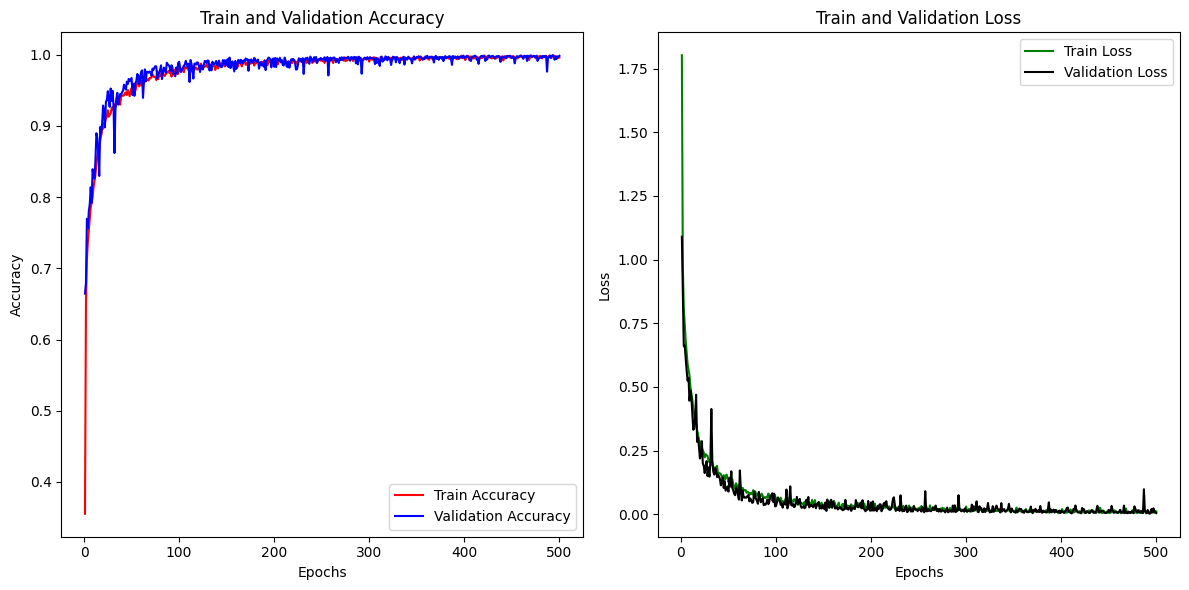

In [14]:
print('val score:', score[0])  
print('val accuracy:', score[1])  

#繪製accuracy-loss曲線  
history.loss_plot()

In [15]:
model.save('Model_9types_Squat_LSTM_final_v1.h5')

In [16]:
#-----EXAM-----#

In [5]:
model = keras.models.load_model('Model_9types_Squat_LSTM_final_v1.h5')

In [18]:
# 將測試集的資料轉換成模型可以接受的形式
Standard_Standard_Exam = np.array(Standard_Standard_Exam) 
Standard_Standard_Exam = Standard_Standard_Exam.reshape(Standard_Standard_Exam.shape[0], 32, 1)
Standard_Narrow_Exam = np.array(Standard_Narrow_Exam) 
Standard_Narrow_Exam = Standard_Narrow_Exam.reshape(Standard_Narrow_Exam.shape[0], 32, 1)
Standard_Wide_Exam = np.array(Standard_Wide_Exam) 
Standard_Wide_Exam = Standard_Wide_Exam.reshape(Standard_Wide_Exam.shape[0], 32, 1)
Narrow_Standard_Exam = np.array(Narrow_Standard_Exam) 
Narrow_Standard_Exam = Narrow_Standard_Exam.reshape(Narrow_Standard_Exam.shape[0], 32, 1)
Narrow_Narrow_Exam = np.array(Narrow_Narrow_Exam) 
Narrow_Narrow_Exam = Narrow_Narrow_Exam.reshape(Narrow_Narrow_Exam.shape[0], 32, 1)
Narrow_Wide_Exam = np.array(Narrow_Wide_Exam) 
Narrow_Wide_Exam = Narrow_Wide_Exam.reshape(Narrow_Wide_Exam.shape[0], 32, 1)
Wide_Standard_Exam = np.array(Wide_Standard_Exam) 
Wide_Standard_Exam = Wide_Standard_Exam.reshape(Wide_Standard_Exam.shape[0], 32, 1)
Wide_Narrow_Exam = np.array(Wide_Narrow_Exam) 
Wide_Narrow_Exam = Wide_Narrow_Exam.reshape(Wide_Narrow_Exam.shape[0], 32, 1)
Wide_Wide_Exam = np.array(Wide_Wide_Exam) 
Wide_Wide_Exam = Wide_Wide_Exam.reshape(Wide_Wide_Exam.shape[0], 32, 1)

In [19]:
import collections
Standard_Standard_Exam_Result = np.argmax(model.predict(Standard_Standard_Exam), axis=-1)
Standard_Narrow_Exam_Result = np.argmax(model.predict(Standard_Narrow_Exam), axis=-1)
Standard_Wide_Exam_Result = np.argmax(model.predict(Standard_Wide_Exam), axis=-1)
Narrow_Standard_Exam_Result = np.argmax(model.predict(Narrow_Standard_Exam), axis=-1)
Narrow_Narrow_Exam_Result = np.argmax(model.predict(Narrow_Narrow_Exam), axis=-1)
Narrow_Wide_Exam_Result = np.argmax(model.predict(Narrow_Wide_Exam), axis=-1)
Wide_Standard_Exam_Result = np.argmax(model.predict(Wide_Standard_Exam), axis=-1)
Wide_Narrow_Exam_Result = np.argmax(model.predict(Wide_Narrow_Exam), axis=-1)
Wide_Wide_Exam_Result = np.argmax(model.predict(Wide_Wide_Exam), axis=-1)

print(Standard_Standard_Exam_Result)
print(collections.Counter(Standard_Standard_Exam_Result))
print(collections.Counter(Standard_Narrow_Exam_Result))
print(collections.Counter(Standard_Wide_Exam_Result))
print(collections.Counter(Narrow_Standard_Exam_Result))
print(collections.Counter(Narrow_Narrow_Exam_Result))
print(collections.Counter(Narrow_Wide_Exam_Result))
print(collections.Counter(Wide_Standard_Exam_Result))
print(collections.Counter(Wide_Narrow_Exam_Result))
print(collections.Counter(Wide_Wide_Exam_Result))

[0 0 0 ... 0 0 0]
Counter({0: 1004})
Counter({1: 416})
Counter({2: 412, 3: 1, 4: 1})
Counter({3: 371, 4: 4})
Counter({4: 343})
Counter({5: 309, 3: 3})
Counter({6: 381, 7: 1})
Counter({7: 356})
Counter({8: 411})


In [20]:
# 合併測試集的資料和標籤
X1_exam = np.concatenate((Standard_Standard_Exam, Standard_Narrow_Exam, Standard_Wide_Exam, 
                          Narrow_Standard_Exam, Narrow_Narrow_Exam, Narrow_Wide_Exam, 
                          Wide_Standard_Exam, Wide_Narrow_Exam, Wide_Wide_Exam), axis=0)
y1_exam = np.concatenate((np.zeros(len(Standard_Standard_Exam)), 
                          np.ones(len(Standard_Narrow_Exam)), 
                          2*np.ones(len(Standard_Wide_Exam)), 
                          3*np.ones(len(Narrow_Standard_Exam)), 
                          4*np.ones(len(Narrow_Narrow_Exam)), 
                          5*np.ones(len(Narrow_Wide_Exam)), 
                          6*np.ones(len(Wide_Standard_Exam)), 
                          7*np.ones(len(Wide_Narrow_Exam)), 
                          8*np.ones(len(Wide_Wide_Exam))), axis=0)

In [21]:
#label
labels = np.zeros(len(Standard_Standard_Exam))  
labels = np.append(labels, np.full((len(Standard_Narrow_Exam)), 1))
labels = np.append(labels, np.full((len(Standard_Wide_Exam)), 2))
labels = np.append(labels, np.full((len(Narrow_Standard_Exam)), 3))
labels = np.append(labels, np.full((len(Narrow_Narrow_Exam)), 4))
labels = np.append(labels, np.full((len(Narrow_Wide_Exam)), 5))
labels = np.append(labels, np.full((len(Wide_Standard_Exam)), 6))
labels = np.append(labels, np.full((len(Wide_Narrow_Exam)), 7))
labels = np.append(labels, np.full((len(Wide_Wide_Exam)), 8))
print(labels) 
print("The amount of data: %i" % len(labels))

[0. 0. 0. ... 8. 8. 8.]
The amount of data: 4013


In [22]:
# 將模型預測概率轉換為類別標籤
y1_exam_pred = np.argmax(model.predict(X1_exam), axis=-1)

# 計算測試集的準確率
accuracy = np.mean(y1_exam_pred == y1_exam)
print('測試集的準確率:', accuracy)

測試集的準確率: 0.9975080986792924


In [43]:
Standard_Standard_Test = pd.read_csv('C:/Users/Miley/openpose/build3/output_csv/for_test_ss0.02.csv', header=None, encoding='gb2312', sep=',')
Standard_Narrow_Test = pd.read_csv('C:/Users/Miley/openpose/build3/output_csv/for_test_sn0.02.csv', header=None, encoding='gb2312', sep=',')
Standard_Wide_Test = pd.read_csv('C:/Users/Miley/openpose/build3/output_csv/for_test_sw0.02.csv', header=None, encoding='gb2312', sep=',')
Narrow_Standard_Test = pd.read_csv('C:/Users/Miley/openpose/build3/output_csv/for_test_ns0.02.csv', header=None, encoding='gb2312', sep=',')
Narrow_Narrow_Test = pd.read_csv('C:/Users/Miley/openpose/build3/output_csv/for_test_nn0.02.csv', header=None, encoding='gb2312', sep=',')
Narrow_Wide_Test = pd.read_csv('C:/Users/Miley/openpose/build3/output_csv/for_test_nw0.02.csv', header=None, encoding='gb2312', sep=',')
Wide_Standard_Test = pd.read_csv('C:/Users/Miley/openpose/build3/output_csv/for_test_ws0.02fake.csv', header=None, encoding='gb2312', sep=',')
Wide_Narrow_Test = pd.read_csv('C:/Users/Miley/openpose/build3/output_csv/for_test_wn0.02.csv', header=None, encoding='gb2312', sep=',')
Wide_Wide_Test = pd.read_csv('C:/Users/Miley/openpose/build3/output_csv/for_test_ww0.02.csv', header=None, encoding='gb2312', sep=',')

In [44]:
# 將測試集的資料轉換成模型可以接受的形式
Standard_Standard_Test = np.array(Standard_Standard_Test) 
Standard_Standard_Test = Standard_Standard_Test.reshape(Standard_Standard_Test.shape[0], 32, 1)
Standard_Narrow_Test = np.array(Standard_Narrow_Test) 
Standard_Narrow_Test = Standard_Narrow_Test.reshape(Standard_Narrow_Test.shape[0], 32, 1)
Standard_Wide_Test = np.array(Standard_Wide_Test) 
Standard_Wide_Test = Standard_Wide_Test.reshape(Standard_Wide_Test.shape[0], 32, 1)
Narrow_Standard_Test = np.array(Narrow_Standard_Test) 
Narrow_Standard_Test = Narrow_Standard_Test.reshape(Narrow_Standard_Test.shape[0], 32, 1)
Narrow_Narrow_Test = np.array(Narrow_Narrow_Test) 
Narrow_Narrow_Test = Narrow_Narrow_Test.reshape(Narrow_Narrow_Test.shape[0], 32, 1)
Narrow_Wide_Test = np.array(Narrow_Wide_Test) 
Narrow_Wide_Test = Narrow_Wide_Test.reshape(Narrow_Wide_Test.shape[0], 32, 1)
Wide_Standard_Test = np.array(Wide_Standard_Test) 
Wide_Standard_Test = Wide_Standard_Test.reshape(Wide_Standard_Test.shape[0], 32, 1)
Wide_Narrow_Test = np.array(Wide_Narrow_Test) 
Wide_Narrow_Test = Wide_Narrow_Test.reshape(Wide_Narrow_Test.shape[0], 32, 1)
Wide_Wide_Test = np.array(Wide_Wide_Test) 
Wide_Wide_Test = Wide_Wide_Test.reshape(Wide_Wide_Test.shape[0], 32, 1)

In [45]:
Standard_Standard_Test_Result = np.argmax(model.predict(Standard_Standard_Test), axis=-1)
Standard_Narrow_Test_Result = np.argmax(model.predict(Standard_Narrow_Test), axis=-1)
Standard_Wide_Test_Result = np.argmax(model.predict(Standard_Wide_Test), axis=-1)
Narrow_Standard_Test_Result = np.argmax(model.predict(Narrow_Standard_Test), axis=-1)
Narrow_Narrow_Test_Result = np.argmax(model.predict(Narrow_Narrow_Test), axis=-1)
Narrow_Wide_Test_Result = np.argmax(model.predict(Narrow_Wide_Test), axis=-1)
Wide_Standard_Test_Result = np.argmax(model.predict(Wide_Standard_Test), axis=-1)
Wide_Narrow_Test_Result = np.argmax(model.predict(Wide_Narrow_Test), axis=-1)
Wide_Wide_Test_Result = np.argmax(model.predict(Wide_Wide_Test), axis=-1)

print(Wide_Standard_Test_Result)
print(collections.Counter(Standard_Standard_Test_Result))
print(collections.Counter(Standard_Narrow_Test_Result))
print(collections.Counter(Standard_Wide_Test_Result))
print(collections.Counter(Narrow_Standard_Test_Result))
print(collections.Counter(Narrow_Narrow_Test_Result))
print(collections.Counter(Narrow_Wide_Test_Result))
print(collections.Counter(Wide_Standard_Test_Result))
print(collections.Counter(Wide_Narrow_Test_Result))
print(collections.Counter(Wide_Wide_Test_Result))

[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 5 8 8 6 6 6]
Counter({0: 123})
Counter({1: 164, 8: 6, 2: 3, 5: 1, 3: 1})
Counter({2: 131, 1: 15})
Counter({3: 186, 4: 15, 5: 4})
Counter({4: 106, 2: 9, 3: 3})
Counter({5: 190, 3: 52, 0: 1, 1: 1})
Counter({6: 162, 8: 2, 5: 1})
Counter({7: 40, 1: 37, 4: 4})
Counter({8: 47, 6: 42, 1: 3})


In [46]:
# 合併測試集的資料和標籤
X1_Test = np.concatenate((Standard_Standard_Test, Standard_Narrow_Test, Standard_Wide_Test, 
                          Narrow_Standard_Test, Narrow_Narrow_Test, Narrow_Wide_Test, 
                          Wide_Standard_Test, Wide_Narrow_Test, Wide_Wide_Test), axis=0)
y1_Test = np.concatenate((np.zeros(len(Standard_Standard_Test)), 
                          np.ones(len(Standard_Narrow_Test)), 
                          2*np.ones(len(Standard_Wide_Test)), 
                          3*np.ones(len(Narrow_Standard_Test)), 
                          4*np.ones(len(Narrow_Narrow_Test)), 
                          5*np.ones(len(Narrow_Wide_Test)), 
                          6*np.ones(len(Wide_Standard_Test)), 
                          7*np.ones(len(Wide_Narrow_Test)), 
                          8*np.ones(len(Wide_Wide_Test))), axis=0)

In [47]:
#label
labels = np.zeros(len(Standard_Standard_Test))  
labels = np.append(labels, np.full((len(Standard_Narrow_Test)), 1))
labels = np.append(labels, np.full((len(Standard_Wide_Test)), 2))
labels = np.append(labels, np.full((len(Narrow_Standard_Test)), 3))
labels = np.append(labels, np.full((len(Narrow_Narrow_Test)), 4))
labels = np.append(labels, np.full((len(Narrow_Wide_Test)), 5))
labels = np.append(labels, np.full((len(Wide_Standard_Test)), 6))
labels = np.append(labels, np.full((len(Wide_Narrow_Test)), 7))
labels = np.append(labels, np.full((len(Wide_Wide_Test)), 8))
print(labels) 
print("The amount of data: %i" % len(labels))

[0. 0. 0. ... 8. 8. 8.]
The amount of data: 1349


In [48]:
# 將模型預測概率轉換為類別標籤
y1_Test_pred = np.argmax(model.predict(X1_Test), axis=-1)

# 計算測試集的準確率
accuracy = np.mean(y1_Test_pred == y1_Test)
print('測試集的準確率:', accuracy)

測試集的準確率: 0.8517420311341735


In [29]:
print(Wide_Standard_Test_Result)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [30]:
print(Wide_Narrow_Test_Result)

[1 1 7 7 4 1 1 1 1 1 1 1 4 1 1 1 4 1 1 7 7 7 1 1 7 7 7 7 7 7 1 1 7 7 1 1 1
 1 4 1 1 1 1 7 7 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 1 1 1 1 1 1 1 1 1 1 7 7
 7 7 7 7 7 7 7]


In [10]:
import pandas as pd
csv_path = '../static/output/csv/output.csv'
df = pd.read_csv(csv_path, header=None, encoding='gb2312', sep=',')
df = np.array(df)
df = df.reshape(df.shape[0], 32, 1)

In [11]:
Result = np.argmax(model.predict(df), axis=-1)

In [12]:
print(Result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
